In [1]:
!pip install insightface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 5.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 61.3 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp311-cp311-linux_x86_64.whl size=1064923 sha256=bb9d0202f2e5536c534c9cdc2aa8d80b30a119f952d310368d2ad1c281acfb1b
  Stored in directory: /root/.cache/pip/wheels/27/d8/22/f52d858d16cd06e7b2e6aad34a1777dcfaf000be833bbf8146
Successfully built insightface


In [2]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.0 MB/s eta 0:00:00


## Importing Libraries

In [3]:
from matplotlib import pyplot as plt
import cv2
import insightface

## Configure params

In [4]:
providers = ["CPUExecutionProvider"]

## Reading Source Face and Target Frame

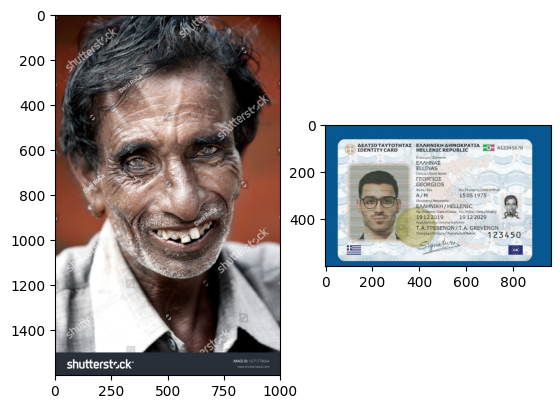

In [93]:
src_frame= cv2.imread('/content/notugly.jpg')
target_frame  = img_fake
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(cv2.cvtColor(src_frame, cv2.COLOR_BGR2RGB))
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(cv2.cvtColor(target_frame, cv2.COLOR_BGR2RGB))
plt.show()

## Identify faces

In [78]:
FACE_ANALYSER = insightface.app.FaceAnalysis(
                    name="buffalo_l",
                    root=".", providers=providers,allowed_modules=["landmark_3d_68", "landmark_2d_106","detection","recognition"]
                )
FACE_ANALYSER.prepare(
                ctx_id=0,
                det_size=(640, 640),
            )

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: ./models/buffalo_l/genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [12]:
!pip install --upgrade protobuf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.2/316.2 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.16.1 requires protobuf<6.0.0dev,>=4.25.2; python_version >= "3.11", but you have protobuf 6.30.1 which is incompatible.
google-cloud-dataproc 5.18.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 6.30.1 which is incompatible.
google-cloud-bigquery-connection 1.18.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 6.30.1 which is incompatible.
google-cloud-translate 3.19.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=

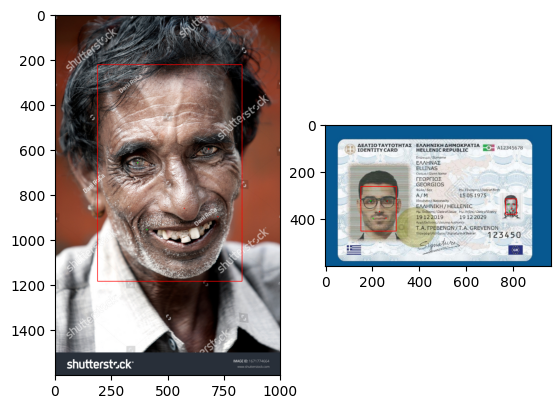

In [90]:
import numpy as np
np.int = int

src_frame= cv2.imread('/content/notugly.jpg')
target_frame  = img_fake

src_faces = FACE_ANALYSER.get(src_frame)
target_faces = FACE_ANALYSER.get(target_frame)
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
rimg = FACE_ANALYSER.draw_on(src_frame,src_faces)
ax1.imshow(cv2.cvtColor(rimg, cv2.COLOR_BGR2RGB))
ax1 = fig.add_subplot(1,2,2)
rimg = FACE_ANALYSER.draw_on(target_frame,target_faces)
ax1.imshow(cv2.cvtColor(rimg, cv2.COLOR_BGR2RGB))
plt.show()

## Face Swapper

In [80]:
model_path = './models/inswapper_128.onnx'
model_swap_insightface = insightface.model_zoo.get_model(model_path, providers=providers)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


In [100]:
src_frame= cv2.imread('/content/45_donald_trump_w-1250.jpg')
target_frame  = cv2.imread('/content/ID_front-960x600-1.jpg')

src_faces = FACE_ANALYSER.get(src_frame)
target_faces = FACE_ANALYSER.get(target_frame)


img_fake = model_swap_insightface.get(img = target_frame, target_face=FACE_ANALYSER.get(target_frame)[0], source_face=src_faces[0], paste_back=True)

In [104]:
for i in range(30):
  src_frame= cv2.imread('/content/45_donald_trump_w-1250.jpg')
  target_frame  = img_fake

  src_faces = FACE_ANALYSER.get(src_frame)
  target_faces = FACE_ANALYSER.get(target_frame)


  img_fake = model_swap_insightface.get(img = target_frame, target_face=FACE_ANALYSER.get(target_frame)[0], source_face=src_faces[0], paste_back=True)

KeyboardInterrupt: 

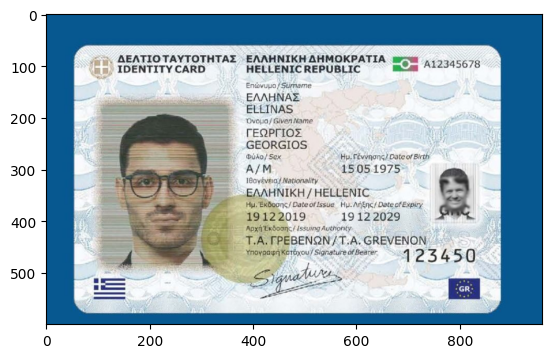

In [105]:
plt.imshow(cv2.cvtColor(img_fake, cv2.COLOR_BGR2RGB))

In [ ]:
cv2.imwrite('ironman_is_back.jpg',img_fake)

True

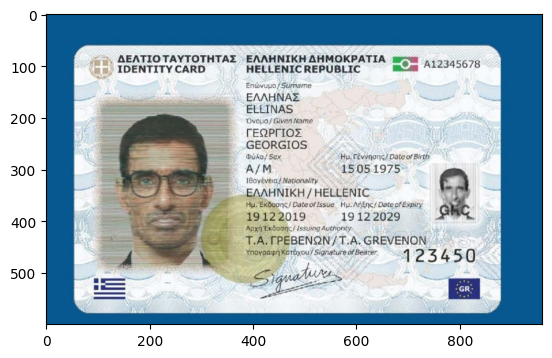

In [94]:
# Perform the face swap without blending parameter.
img_fake_swapped = model_swap_insightface.get(
    img=target_frame,
    target_face=FACE_ANALYSER.get(target_frame)[0],
    source_face=src_faces[0],
    paste_back=True
)

# Blend the swapped result with the original target frame.
# Increase the weight from the swapped (source) face by setting blend_factor closer to 1.
blend_factor = 0.8  # Adjust this value (0.0 to 1.0) as needed.
img_fake = cv2.addWeighted(img_fake_swapped, blend_factor, target_frame, 1 - blend_factor, 0)

plt.imshow(cv2.cvtColor(img_fake, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
model_swap_insightface = insightface.model_zoo.get_model(model_path, providers=providers)

In [44]:
import cv2
import numpy as np
import dlib

img = cv2.imread("/content/ID_front-960x600-1.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(img_gray)


detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
faces = detector(img_gray)
for face in faces:
    landmarks = predictor(img_gray, face)
    landmarks_points = []
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points.append((x, y))
points = np.array(landmarks_points, np.int32)
convexhull = cv2.convexHull(points)
#cv2.polylines(img, [convexhull], True, (255, 0, 0), 3)
cv2.fillConvexPoly(mask, convexhull, 255)

RuntimeError: Unsupported image type, must be 8bit gray or RGB image.

In [40]:
!wget https://raw.githubusercontent.com/italojs/facial-landmarks-recognition/master/shape_predictor_68_face_landmarks.dat

--2025-03-19 07:23:37--  https://raw.githubusercontent.com/italojs/facial-landmarks-recognition/master/shape_predictor_68_face_landmarks.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99693937 (95M) [application/octet-stream]
Saving to: ‘shape_predictor_68_face_landmarks.dat’

shape_predictor_68_ 100%[===================>]  95.08M   201MB/s    in 0.5s    

2025-03-19 07:23:38 (201 MB/s) - ‘shape_predictor_68_face_landmarks.dat’ saved [99693937/99693937]



In [43]:
type(img_gray)

numpy.ndarray

In [45]:
!pip install onnx onnxruntime opencv-python insightface gdown

In [46]:
import datetime
import numpy as np
import os
import os.path as osp
import glob
import cv2
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image
import matplotlib.pyplot as plt
import gdown
from PIL import Image
from google.colab import files

In [47]:
print('insightface', insightface.__version__)
print('numpy', np.__version__)

# Check that InsightFace version is at least 0.7
assert float('.'.join(insightface.__version__.split('.')[:2])) >= float('0.7')

insightface 0.7.3
numpy 2.0.2


In [48]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))

download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:06<00:00, 42853.52KB/s]
/usr/local/lib/python3.11/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:118: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [49]:
# Import the library
import gdown

# Google Drive file ID
file_id = '1krOLgjW2tAPaqV-Bw4YALz0xT5zlb5HF'
# Construct the download URL
url = f'https://drive.google.com/uc?id={file_id}'
# Download the file
gdown.download(url, 'inswapper_128.onnx', quiet=False)

# Verify the download
!ls -l inswapper_128.onnx


Downloading...
From (original): https://drive.google.com/uc?id=1krOLgjW2tAPaqV-Bw4YALz0xT5zlb5HF
From (redirected): https://drive.google.com/uc?id=1krOLgjW2tAPaqV-Bw4YALz0xT5zlb5HF&confirm=t&uuid=708c2fc2-4e21-418e-8d63-29ff27d7626e
To: /content/inswapper_128.onnx
100%|██████████| 554M/554M [00:05<00:00, 97.2MB/s]

-rw-r--r-- 1 root root 554253681 May 28  2023 inswapper_128.onnx


In [50]:
swapper = insightface.model_zoo.get_model('inswapper_128.onnx',
                                          download=False,
                                          download_zip=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


In [51]:
def swap_n_show(img1_fn, img2_fn, app, swapper, plot_before=True, plot_after=True):
    """
    Uses face swapper to swap faces in two different images.

    plot_before: if True shows the images before the swap
    plot_after: if True shows the images after the swap

    returns images with swapped faces.

    Assumes one face per image.
    """
    img1 = cv2.imread(img1_fn)
    img2 = cv2.imread(img2_fn)

    if plot_before:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img1[:,:,::-1])
        axs[0].axis('off')
        axs[1].imshow(img2[:,:,::-1])
        axs[1].axis('off')
        plt.show()

    # Do the swap
    face1 = app.get(img1)[0]
    face2 = app.get(img2)[0]

    img1_ = img1.copy()
    img2_ = img2.copy()

    if plot_after:
        img1_ = swapper.get(img1_, face1, face2, paste_back=True)
        img2_ = swapper.get(img2_, face2, face1, paste_back=True)
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img1_[:,:,::-1])
        axs[0].axis('off')
        axs[1].imshow(img2_[:,:,::-1])
        axs[1].axis('off')
        plt.show()

    return img1_, img2_

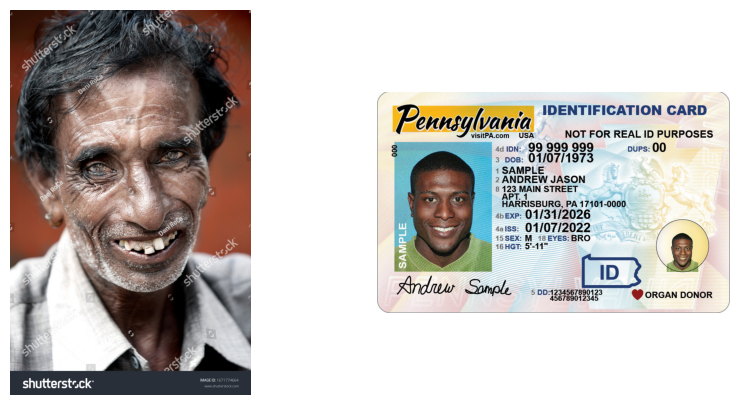

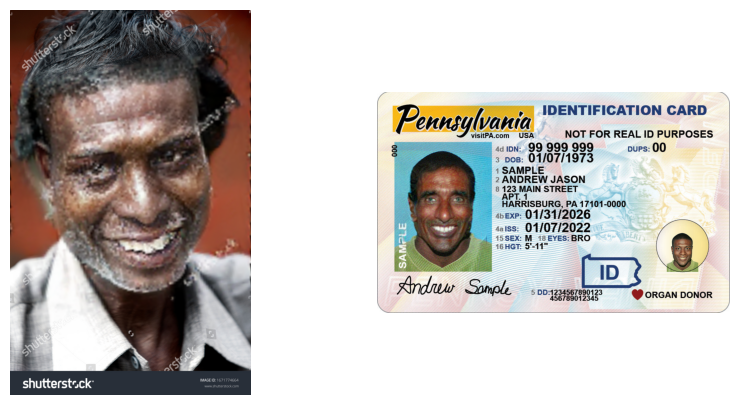

In [63]:
image_files=["/content/notugly.jpg","/content/standard-issue (non-compliant) photo id card.jpg"]
if True:
    img1_fn, img2_fn = image_files[:2]
    swapped_img1, swapped_img2 = swap_n_show(img1_fn, img2_fn, app, swapper)

    # Convert numpy arrays to RGB format for saving as images
    swapped_img1_rgb = cv2.cvtColor(swapped_img1, cv2.COLOR_BGR2RGB)
    swapped_img2_rgb = cv2.cvtColor(swapped_img2, cv2.COLOR_BGR2RGB)

    # Save the swapped images
    #Image.fromarray(np.uint8(swapped_img1_rgb)).save("/content/45_donald_trump_w-1250.jpg")
    #Image.fromarray(np.uint8(swapped_img2_rgb)).save("/content/ID_front-960x600-1.jpg")

    # Download the swapped images
    #files.download("swapped_image1.jpg")
    #files.download("swapped_image2.jpg")

else:
    print("Please upload at least two images for swapping.")

In [59]:
swapper

In [65]:
import cv2
import numpy as np
import dlib

def get_landmarks(detector, predictor, image):
    """
    Detect facial landmarks for the first detected face.
    Returns a list of (x, y) tuples for 68 landmarks.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    if len(faces) == 0:
        return None
    landmarks = predictor(gray, faces[0])
    points = []
    for i in range(68):
        point = (landmarks.part(i).x, landmarks.part(i).y)
        points.append(point)
    return points

def warp_triangle(src, dst, src_tri, dst_tri):
    """
    Warp a triangular region from the source image to the destination image.
    """
    # Compute bounding rectangles for each triangle
    src_rect = cv2.boundingRect(np.float32([src_tri]))
    dst_rect = cv2.boundingRect(np.float32([dst_tri]))

    # Offset triangle points by the top left corner of the respective rectangles
    src_tri_offset = []
    dst_tri_offset = []
    for i in range(3):
        src_tri_offset.append(((src_tri[i][0] - src_rect[0]), (src_tri[i][1] - src_rect[1])))
        dst_tri_offset.append(((dst_tri[i][0] - dst_rect[0]), (dst_tri[i][1] - dst_rect[1])))

    # Crop the source patch
    src_cropped = src[src_rect[1]:src_rect[1]+src_rect[3], src_rect[0]:src_rect[0]+src_rect[2]]

    # Compute the affine transform
    warp_mat = cv2.getAffineTransform(np.float32(src_tri_offset), np.float32(dst_tri_offset))
    dst_cropped = cv2.warpAffine(src_cropped, warp_mat, (dst_rect[2], dst_rect[3]), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101)

    # Create a mask for the triangle in the destination patch
    mask = np.zeros((dst_rect[3], dst_rect[2], 3), dtype=np.float32)
    cv2.fillConvexPoly(mask, np.int32(dst_tri_offset), (1.0, 1.0, 1.0), 16, 0)

    # Blend the warped triangle into the destination image patch
    dst_cropped = dst_cropped * mask
    dst_area = dst[dst_rect[1]:dst_rect[1]+dst_rect[3], dst_rect[0]:dst_rect[0]+dst_rect[2]]
    dst_area = dst_area * (1 - mask)
    dst_area = dst_area + dst_cropped
    dst[dst_rect[1]:dst_rect[1]+dst_rect[3], dst_rect[0]:dst_rect[0]+dst_rect[2]] = dst_area

def apply_face_swap(src_img, dst_img, src_points, dst_points):
    """
    Swaps the face from src_img into dst_img using the provided landmark points.
    """
    # Compute convex hull for the destination face landmarks
    hull_index = cv2.convexHull(np.array(dst_points), returnPoints=False)
    hull1 = []
    hull2 = []
    for i in range(len(hull_index)):
        idx = hull_index[i][0]
        hull1.append(src_points[idx])
        hull2.append(dst_points[idx])

    # Find Delaunay triangulation for destination face region
    size = dst_img.shape
    rect = (0, 0, size[1], size[0])
    subdiv = cv2.Subdiv2D(rect)
    for point in hull2:
        subdiv.insert(point)
    triangle_list = subdiv.getTriangleList()

    # Collect triangle indices corresponding to points in hull2
    triangle_indices = []
    for t in triangle_list:
        pts = [(t[0], t[1]), (t[2], t[3]), (t[4], t[5])]
        indices = []
        for pt in pts:
            for i in range(len(hull2)):
                if abs(pt[0] - hull2[i][0]) < 1.0 and abs(pt[1] - hull2[i][1]) < 1.0:
                    indices.append(i)
        if len(indices) == 3:
            triangle_indices.append(indices)

    # Warp each triangle from the source face to the destination face
    for indices in triangle_indices:
        src_tri = [hull1[indices[0]], hull1[indices[1]], hull1[indices[2]]]
        dst_tri = [hull2[indices[0]], hull2[indices[1]], hull2[indices[2]]]
        warp_triangle(src_img, dst_img, src_tri, dst_tri)

    # Create a mask for the seamless cloning
    hull2_np = np.array(hull2, np.int32)
    mask = np.zeros(dst_img.shape, dtype=dst_img.dtype)
    cv2.fillConvexPoly(mask, hull2_np, (255, 255, 255))
    center = (int(np.mean(hull2_np[:, 0])), int(np.mean(hull2_np[:, 1])))

    # Use seamless cloning to blend the spliced face into the destination image (smoothing)
    output = cv2.seamlessClone(dst_img, dst_img, mask, center, cv2.NORMAL_CLONE)
    return output

def main():
    # Load the source and destination images (ensure these images exist in your working directory)
    src_img = cv2.imread("/content/ID_front-960x600-1.jpg")
    dst_img = cv2.imread("/content/45_donald_trump_w-1250.jpg")

    if src_img is None or dst_img is None:
        print("Could not load images. Please check the paths.")
        return

    # Initialize dlib's face detector and load the landmark predictor model
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")  # Update with the correct path if necessary

    # Get landmarks for source and destination faces
    src_points = get_landmarks(detector, predictor, src_img)
    dst_points = get_landmarks(detector, predictor, dst_img)

    if src_points is None or dst_points is None:
        print("Could not detect faces in one of the images.")
        return

    # Apply the face swap / splicing
    output = apply_face_swap(src_img.copy(), dst_img.copy(), src_points, dst_points)

    # Display the output
    cv2.imshow("Face Splice", output)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [70]:
import cv2
import numpy as np
import dlib
from google.colab.patches import cv2_imshow

def get_landmarks(detector, predictor, image):
    """
    Detect facial landmarks for the first detected face.
    Returns a list of (x, y) tuples for 68 landmarks.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    if len(faces) == 0:
        return None
    landmarks = predictor(gray, faces[0])
    points = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(68)]
    return points

def warp_triangle(src, dst, src_tri, dst_tri):
    """
    Warp a triangular region from the source image to the destination image.
    """
    src_rect = cv2.boundingRect(np.float32([src_tri]))
    dst_rect = cv2.boundingRect(np.float32([dst_tri]))

    src_tri_offset = [((src_tri[i][0] - src_rect[0]), (src_tri[i][1] - src_rect[1])) for i in range(3)]
    dst_tri_offset = [((dst_tri[i][0] - dst_rect[0]), (dst_tri[i][1] - dst_rect[1])) for i in range(3)]

    src_cropped = src[src_rect[1]:src_rect[1]+src_rect[3], src_rect[0]:src_rect[0]+src_rect[2]]
    warp_mat = cv2.getAffineTransform(np.float32(src_tri_offset), np.float32(dst_tri_offset))
    dst_cropped = cv2.warpAffine(src_cropped, warp_mat, (dst_rect[2], dst_rect[3]), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101)

    mask = np.zeros((dst_rect[3], dst_rect[2], 3), dtype=np.float32)
    cv2.fillConvexPoly(mask, np.int32(dst_tri_offset), (1.0, 1.0, 1.0), 16, 0)

    dst_cropped = dst_cropped * mask
    dst_area = dst[dst_rect[1]:dst_rect[1]+dst_rect[3], dst_rect[0]:dst_rect[0]+dst_rect[2]]
    dst_area = dst_area * (1 - mask)
    dst_area = dst_area + dst_cropped
    dst[dst_rect[1]:dst_rect[1]+dst_rect[3], dst_rect[0]:dst_rect[0]+dst_rect[2]] = dst_area

def apply_face_swap(src_img, dst_img, src_points, dst_points):
    """
    Swaps the face from src_img into dst_img using the provided landmark points.
    """
    hull_index = cv2.convexHull(np.array(dst_points), returnPoints=False)
    hull1 = [src_points[idx[0]] for idx in hull_index]
    hull2 = [dst_points[idx[0]] for idx in hull_index]

    size = dst_img.shape
    rect = (0, 0, size[1], size[0])
    subdiv = cv2.Subdiv2D(rect)
    for point in hull2:
        subdiv.insert(point)
    triangle_list = subdiv.getTriangleList()

    triangle_indices = []
    for t in triangle_list:
        pts = [(t[0], t[1]), (t[2], t[3]), (t[4], t[5])]
        indices = []
        for pt in pts:
            for i in range(len(hull2)):
                if abs(pt[0] - hull2[i][0]) < 1.0 and abs(pt[1] - hull2[i][1]) < 1.0:
                    indices.append(i)
        if len(indices) == 3:
            triangle_indices.append(indices)

    for indices in triangle_indices:
        src_tri = [hull1[indices[0]], hull1[indices[1]], hull1[indices[2]]]
        dst_tri = [hull2[indices[0]], hull2[indices[1]], hull2[indices[2]]]
        warp_triangle(src_img, dst_img, src_tri, dst_tri)

    hull2_np = np.array(hull2, np.int32)
    mask = np.zeros(dst_img.shape, dtype=dst_img.dtype)
    cv2.fillConvexPoly(mask, hull2_np, (255, 255, 255))
    center = (int(np.mean(hull2_np[:, 0])), int(np.mean(hull2_np[:, 1])))

    output = cv2.seamlessClone(dst_img, dst_img, mask, center, cv2.NORMAL_CLONE)
    return output

def main():
    print("Loading images...")
    src_img = cv2.imread("/content/Photo-ID-Card.png")
    dst_img = cv2.imread("/content/45_donald_trump_w-1250.jpg")

    if src_img is None or dst_img is None:
        print("Could not load images. Please check the file paths in your Colab environment.")
        return
    print("Images loaded successfully.")

    print("Initializing face detector and shape predictor...")
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

    print("Detecting landmarks in the source image...")
    src_points = get_landmarks(detector, predictor, src_img)
    if src_points is None:
        print("No face detected in the source image.")
        return
    print("Source face landmarks detected.")

    print("Detecting landmarks in the destination image...")
    dst_points = get_landmarks(detector, predictor, dst_img)
    if dst_points is None:
        print("No face detected in the destination image.")
        return
    print("Destination face landmarks detected.")

    print("Applying face swap...")
    output = apply_face_swap(src_img.copy(), dst_img.copy(), src_points, dst_points)
    print("Face swap applied. Displaying output...")
    cv2_imshow(output)
    print("Done.")

# Directly call main() for Colab
main()


Loading images...
Images loaded successfully.
Initializing face detector and shape predictor...
Detecting landmarks in the source image...


RuntimeError: Unsupported image type, must be 8bit gray or RGB image.

In [71]:
def get_landmarks(detector, predictor, image):
    """
    Detect facial landmarks for the first detected face.
    Returns a list of (x, y) tuples for 68 landmarks.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    print("Gray image dtype before casting:", gray.dtype)  # Debug print
    # Ensure the image is in 8-bit format
    if gray.dtype != np.uint8:
        gray = np.array(gray, dtype=np.uint8)
    print("Gray image dtype after casting:", gray.dtype)  # Debug print

    faces = detector(gray)
    if len(faces) == 0:
        return None
    landmarks = predictor(gray, faces[0])
    points = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(68)]
    return points

src_img = cv2.imread("/content/45_donald_trump_w-1250.jpg")
dst_img = cv2.imread("/content/Photo-ID-Card.png")
print("Source image dtype:", src_img.dtype, "Shape:", src_img.shape)
print("Destination image dtype:", dst_img.dtype, "Shape:", dst_img.shape)

Source image dtype: uint8 Shape: (1250, 1250, 3)
Destination image dtype: uint8 Shape: (1616, 2560, 3)


In [72]:
def main():
    print("Loading images...")
    src_img = cv2.imread("/content/45_donald_trump_w-1250.jpg")
    dst_img = cv2.imread("/content/Photo-ID-Card.png")

    if src_img is None or dst_img is None:
        print("Could not load images. Please check the file paths in your Colab environment.")
        return
    print("Images loaded successfully.")

    print("Initializing face detector and shape predictor...")
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

    print("Detecting landmarks in the source image...")
    src_points = get_landmarks(detector, predictor, src_img)
    if src_points is None:
        print("No face detected in the source image.")
        return
    print("Source face landmarks detected.")

    print("Detecting landmarks in the destination image...")
    dst_points = get_landmarks(detector, predictor, dst_img)
    if dst_points is None:
        print("No face detected in the destination image.")
        return
    print("Destination face landmarks detected.")

    print("Applying face swap...")
    output = apply_face_swap(src_img.copy(), dst_img.copy(), src_points, dst_points)
    print("Face swap applied. Displaying output...")
    cv2_imshow(output)
    print("Done.")

# Directly call main() for Colab
main()

Loading images...
Images loaded successfully.
Initializing face detector and shape predictor...
Detecting landmarks in the source image...
Gray image dtype before casting: uint8
Gray image dtype after casting: uint8


RuntimeError: Unsupported image type, must be 8bit gray or RGB image.